# Assignment on Model Selection

## Q.1. Load the dataset in to Python environment

In [1]:
# importing all essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns    
import warnings


In [2]:
# loading the dataset from local folder
data=pd.read_csv(r"C:\Users\Amby\Downloads\titanic_dataset.csv")


### Checking the basic details about the dataset

In [3]:
data.head()   #displays all columns and first five rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape  # displays total no: of rows and columns

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.PassengerId.nunique()

891

#### The column 'PassengerId' has unique values starting from 1 to 891. Since this column doesnot contribute anything to the model, we can drop this column.

### Dropping 'PassengerId' column

In [7]:
data.drop('PassengerId',axis=1,inplace=True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data['Survived'].value_counts() # displays the counts of unique values

0    549
1    342
Name: Survived, dtype: int64

## Q.2.Do all the necessary pre-processing steps

### Missing Value Handling

In [9]:
data.isna().sum()   # checking for missing values

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

#### The dataset has missing values in 'Age', 'Cabin' and 'Embarked' columns.

#### Since, the 'Cabin' column has around 70% of null values, we can drop that column too instead of filling it with median or mode.

In [10]:
data.drop('Cabin',axis=1,inplace=True)

### Filling the missing values with median and mode for numerical column and categorical columns respectively

In [11]:
# filling the missing values with median of 'Age' data
data["Age"]=data['Age'].fillna(data['Age'].median())
# filling the missing values with mode of categorical data
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [12]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

#### Now, there is no missing values in the dataset.

In [13]:
data.shape

(891, 10)

In [14]:
data['Name'].nunique()

891

In [15]:
data['Ticket'].nunique()

681

#### Since all the values in column 'Name' and around 70% of values in column 'Ticket' are unique, it will not contribute anything to the model, we can drop that columns also.

In [16]:
data.drop(['Name','Ticket'],axis=1,inplace=True)

In [17]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Outlier Handling

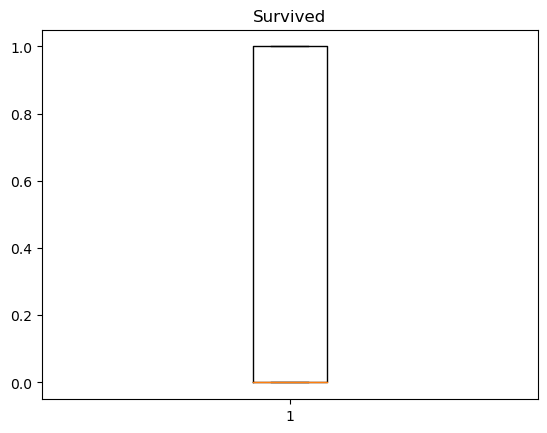

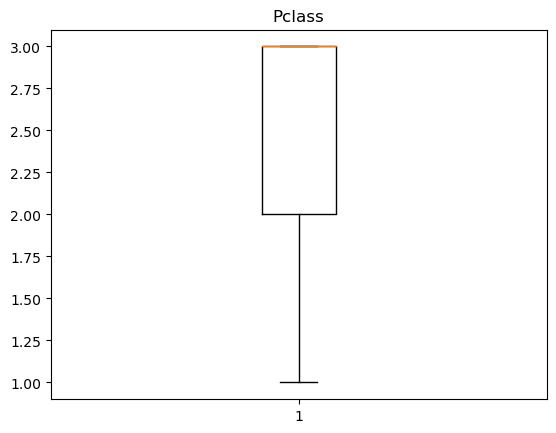

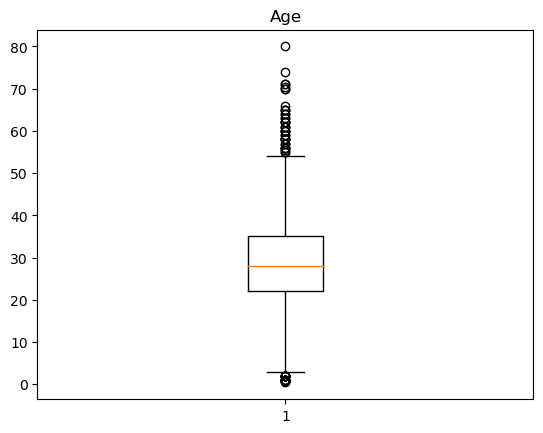

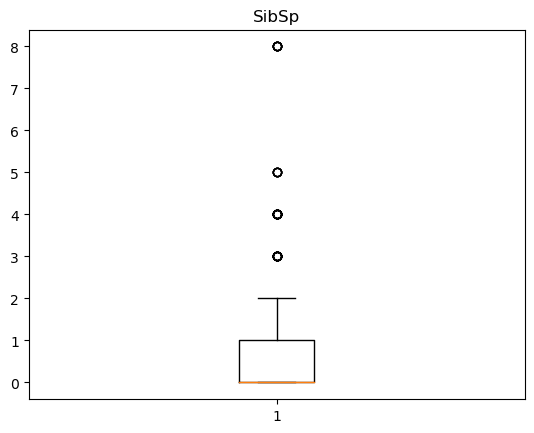

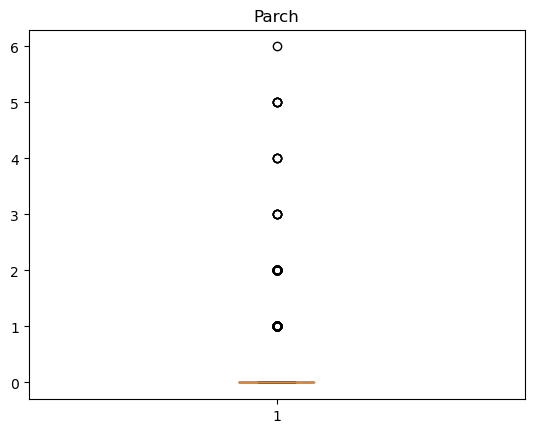

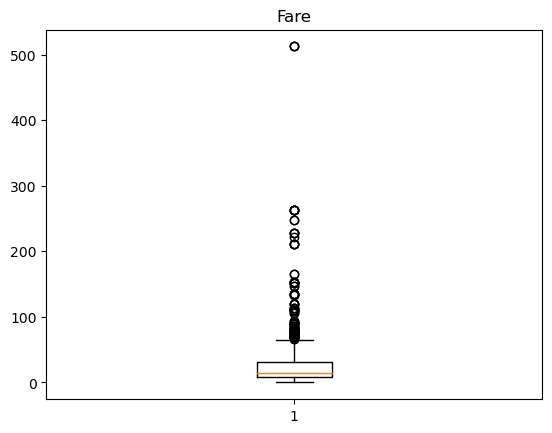

In [18]:
num_data=['Survived','Pclass','Age','SibSp','Parch','Fare']
for i in num_data:
    plt.boxplot(data[i])
    plt.title(i)
    plt.show()

In [19]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
num_cols=['Age','Fare']
data[num_cols]=scaler.fit_transform(data[num_cols])


In [51]:
Q1_P=np.percentile(data['Parch'],25,interpolation='midpoint')
Q2_P=np.percentile(data['Parch'],50,interpolation='midpoint')
Q3_P=np.percentile(data['Parch'],75,interpolation='midpoint')
warnings.filterwarnings('ignore')
IQR_P=Q3_P-Q1_P
up_lim_P=Q3_P+1.5*IQR_P
low_lim_P=Q1_P-1.5*IQR_P
data['Parch']=np.where(data['Parch']>up_lim_P,up_lim_P,np.where(data['Parch']<low_lim_P,low_lim_P,data['Parch']))

In [21]:
Q1_S=np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2_S=np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3_S=np.percentile(data['SibSp'],75,interpolation='midpoint')
warnings.filterwarnings('ignore')
IQR_S=Q3_S-Q1_S
up_lim_S=Q3_S+1.5*IQR_S
low_lim_S=Q1_S-1.5*IQR_S
data['SibSp']=np.where(data['SibSp']>up_lim_S,up_lim_S,np.where(data['SibSp']<low_lim_S,low_lim_S,data['SibSp']))

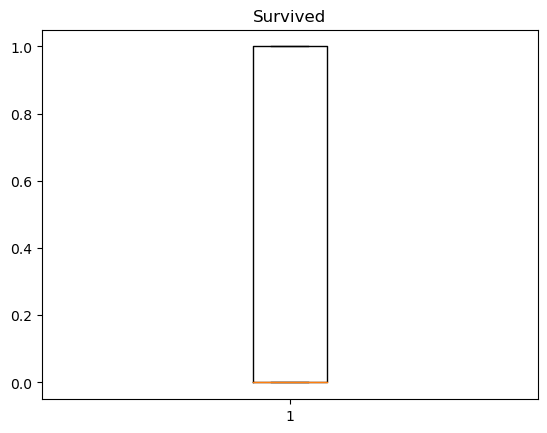

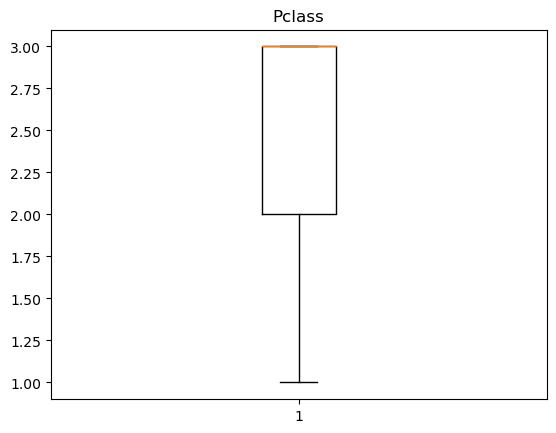

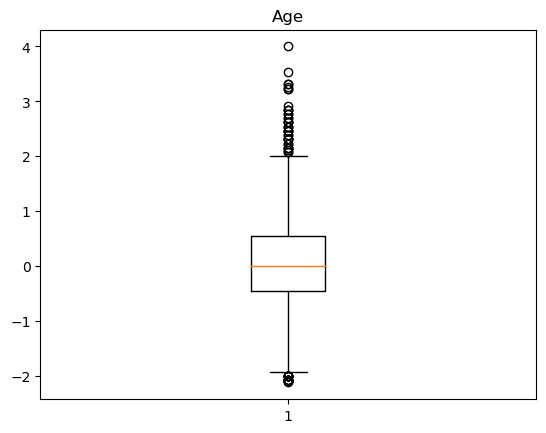

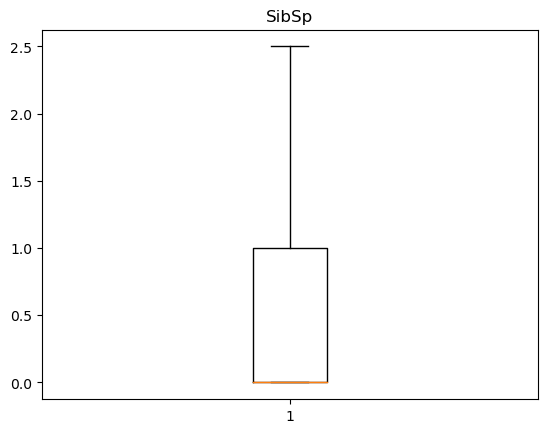

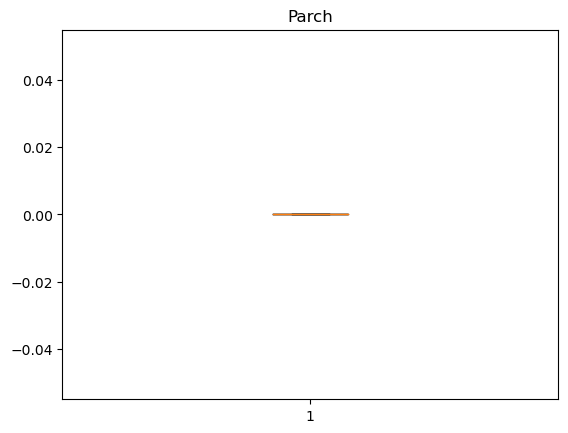

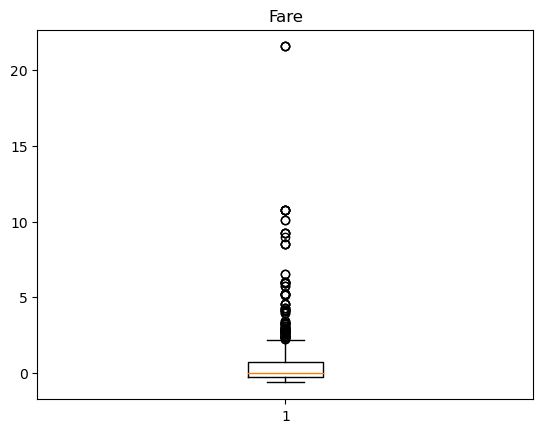

In [22]:
num_data=['Survived','Pclass','Age','SibSp','Parch','Fare']
for i in num_data:
    plt.boxplot(data[i])
    plt.title(i)
    plt.show()

#### For the columns 'Parch' and 'SibSp', we apply flooring and  mapping to handle the outliers . Since there are more no: of outliers in 'Age' And 'Fare' , and the data in that columns are significantly important, we applied RobustScaler technique. This technique mitigates the influence of outliers on the data.

### Encoding Categorical Features

In [23]:
# Label Encoding the categorical features
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])
data['Embarked']=le.fit_transform(data['Embarked'])

In [24]:
# Standard Scaling the 'Age' and 'Fare' columns 
scaler=StandardScaler()
data[['Age','Fare']]=scaler.fit_transform(data[['Age','Fare']])

### Splitting the data into feature and Target

In [25]:
X=data.drop('Survived',axis=1) #predictor or independent variable
y=data['Survived'] # target or dependent variable

### Splitting the data into training and testing data

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=70)

## Q.3. Create k-NN and SVM Models

### Implementing k-NN Model

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
metric=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    classifier.fit(X_train,y_train)
    y_pred_knn=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

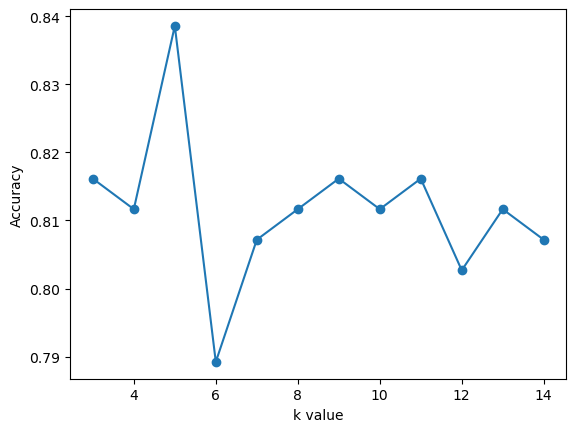

In [28]:
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.show()

*The above set of codes calculate and store the accuracy scores for different values of 'k' in the metric list.

*After the loop finishes,the accuracy scores are plotted against the no: of neighbors, x-axis represents the no: of neighbors and y-axis represents the accuracy scores.

*The resulting plot will show how the accuracy of the k-NN model varies with the different values of 'k', allowing us to determine the optimal no: of neighbors of this model.



In [29]:
# creating a k-NN classifier with n_neighbors=5
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y_train)
y_pred_knn=classifier.predict(X_test)

In [30]:
# Evaluating the k-NN model by finding the metrics
print("Precision score: ",precision_score(y_test,y_pred_knn,average='micro'))
print("Recall :",recall_score(y_test,y_pred_knn,average='micro'))
print("f1 :",f1_score(y_test,y_pred_knn,average='micro'))
print("Accuracy :",accuracy_score(y_test,y_pred_knn))

Precision score:  0.8385650224215246
Recall : 0.8385650224215246
f1 : 0.8385650224215246
Accuracy : 0.8385650224215246


In [31]:
print("Confusion Matrix :",confusion_matrix(y_test,y_pred_knn))

Confusion Matrix : [[121  10]
 [ 26  66]]


### Implementing SVM Model

In [32]:
from sklearn.svm import SVC
svmclf=SVC(kernel='poly') # creating an instance SVC class with kernel='poly'
svmclf.fit(X_train,y_train)

SVC(kernel='poly')

In [33]:
y_pred_svm=svmclf.predict(X_test)

In [34]:
# Evaluating the SVM model by finding the metrics
print("Precision score: ",precision_score(y_test,y_pred_svm))
print("Recall :",recall_score(y_test,y_pred_svm))
print("f1 :",f1_score(y_test,y_pred_svm))
print("Accuracy :",accuracy_score(y_test,y_pred_svm))

Precision score:  0.8470588235294118
Recall : 0.782608695652174
f1 : 0.8135593220338984
Accuracy : 0.852017937219731


In [35]:
print("Confusion Matrix :",confusion_matrix(y_test,y_pred_svm))

Confusion Matrix : [[118  13]
 [ 20  72]]


#### By comparing the accuracy scores of k-NN and SVM models, the SVM model gives better accuracy score than k-NN model.

## Q.4. Do K-fold and Stratified K-Fold Cross validation techniques and find the average accuracy score of the models

   ### Implementing K-Fold Cross Validation in both models

In [36]:
from sklearn.model_selection import KFold

In [37]:
data.shape

(891, 8)

In [38]:
kfold_validator=KFold(n_splits=10,shuffle=True,random_state=42)

In [39]:
from sklearn.model_selection import cross_val_score


In [40]:
# K=Fold Cross validation on SVM model
cv_score_svm=cross_val_score(svmclf,X,y,cv=kfold_validator)
cv_score_svm

array([0.81111111, 0.80898876, 0.82022472, 0.76404494, 0.83146067,
       0.86516854, 0.7752809 , 0.7752809 , 0.73033708, 0.86516854])

In [41]:
np.mean(cv_score_svm) # finding average of the cv_scores

0.8047066167290886

In [42]:
# K-Fold Cross validation on k-NN model
cv_score_knn=cross_val_score(classifier,X,y,cv=kfold_validator)

In [43]:
cv_score_knn

array([0.84444444, 0.78651685, 0.83146067, 0.79775281, 0.79775281,
       0.85393258, 0.79775281, 0.7752809 , 0.75280899, 0.86516854])

In [44]:
np.mean(cv_score_knn) # finding average of cv_scores

0.810287141073658

### Implementing Stratified K-Fold Cross Validation

In [45]:
from sklearn.model_selection import StratifiedKFold

In [46]:
skfold_validator=StratifiedKFold(n_splits=10,shuffle=True,random_state=78)


In [47]:
# Stratified K-Fold cross validation on k-NN Model
skcv_score_knn=cross_val_score(classifier,X,y,cv=skfold_validator)
skcv_score_knn

array([0.74444444, 0.84269663, 0.78651685, 0.82022472, 0.78651685,
       0.79775281, 0.84269663, 0.78651685, 0.84269663, 0.80898876])

In [48]:
np.mean(skcv_score_knn) #finding average of cross validation scores

0.8059051186017478

In [49]:
# Stratified K-Fold cross validation on SVM Model
skcv_score_svm=cross_val_score(svmclf,X,y,cv=skfold_validator)
skcv_score_svm

array([0.73333333, 0.87640449, 0.79775281, 0.83146067, 0.7752809 ,
       0.78651685, 0.82022472, 0.7752809 , 0.86516854, 0.80898876])

In [50]:
np.mean(skcv_score_svm) #finding average of cross validation scores

0.8070411985018726

#### After both cross validation techniques, SVM model shows better performance than k-NN model.

#### After performing cross validation, the accuracy scores of both models do not show much improvement, but remain consistently similiar across different folds. It suggests that the model's performance is stable and doesn't significantly vary with different train-test splits. Also, it implies that the models have learned all the available patterns and further optimization may not yield substantial improvements in performance. They may be appropriately balanced in terms of complexity and generalization. Such models avoid overfitting.    